# Seattle Apartment Listings

## In this notebook I'll try to look at apartment listings in Seattle

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Done")

Done


In [2]:
pwd

'/Users/sukanto/Google Drive/allprojects/Seattle_Airbnb/Seattle-Airbnb'

In [3]:
df = pd.read_csv('clean_listings.csv',index_col=0)
df.head()

,id,last_scraped,name,summary,space,description,neighborhood_overview,transit,host_id,host_name,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,956883,Maija,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",5177328,Andrea,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,9851441,Emily,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [4]:
df.shape

(3818, 81)

In [5]:
df.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'transit', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_

## Subsetting and visualising the data

### Time to get some granularity in the analysis by subsetting the data and visualising it.

In [7]:
df1 = df[['neighbourhood_group_cleansed','property_type', 
          'room_type', 'accommodates','price', 'weekly_price', 'monthly_price',
         'minimum_nights','maximum_nights','has_availability',
       'availability_30', 'availability_60', 'availability_90', 'availability_365',
         'bathrooms', 'bedrooms', 'beds', 'bed_type', 'accommodates','host_response_rate',
         'review_scores_rating','review_scores_checkin','review_scores_location',
          'review_scores_communication','reviews_per_month']] #grabbing the columns needed
df1.head()

,neighbourhood_group_cleansed,property_type,room_type,accommodates,price,weekly_price,monthly_price,minimum_nights,maximum_nights,has_availability,...,bedrooms,beds,bed_type,accommodates,host_response_rate,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication,reviews_per_month
0,Queen Anne,Apartment,Entire home/apt,4,$85.00,NaN,NaN,1,365,t,...,1.0,1.0,Real Bed,4,96%,95.0,10.0,9.0,10.0,4.07
1,Queen Anne,Apartment,Entire home/apt,4,$150.00,"$1,000.00","$3,000.00",2,90,t,...,1.0,1.0,Real Bed,4,98%,96.0,10.0,10.0,10.0,1.48
2,Queen Anne,House,Entire home/apt,11,$975.00,NaN,NaN,4,30,t,...,5.0,7.0,Real Bed,11,67%,97.0,10.0,10.0,10.0,1.15
3,Queen Anne,Apartment,Entire home/apt,3,$100.00,$650.00,"$2,300.00",1,1125,t,...,0.0,2.0,Real Bed,3,NaN,NaN,NaN,NaN,NaN,1.54
4,Queen Anne,House,Entire home/apt,6,$450.00,NaN,NaN,1,1125,t,...,3.0,3.0,Real Bed,6,100%,92.0,10.0,9.0,10.0,0.89


In [8]:
df1.shape #looking at the shape of the thing

(3818, 25)

In [9]:
df1.columns

Index(['neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'price', 'weekly_price', 'monthly_price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'accommodates', 'host_response_rate', 'review_scores_rating',
       'review_scores_checkin', 'review_scores_location',
       'review_scores_communication', 'reviews_per_month'],
      dtype='object')

In [10]:
df1.isnull().any() #what about the missing values?

neighbourhood_group_cleansed    False
property_type                    True
room_type                       False
accommodates                    False
price                           False
weekly_price                     True
monthly_price                    True
minimum_nights                  False
maximum_nights                  False
has_availability                False
availability_30                 False
availability_60                 False
availability_90                 False
availability_365                False
bathrooms                        True
bedrooms                         True
beds                             True
bed_type                        False
accommodates                    False
host_response_rate               True
review_scores_rating             True
review_scores_checkin            True
review_scores_location           True
review_scores_communication      True
reviews_per_month               False
dtype: bool

In [11]:
df1.describe() #summary stats for the numeric data

,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,bathrooms,bedrooms,beds,accommodates,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication,reviews_per_month
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3171.000000,3160.000000,3163.000000,3167.000000,3818.000000
mean,3.349398,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,1.259469,1.307712,1.735394,3.349398,94.539262,9.786709,9.608916,9.809599,1.990416
std,1.977599,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,0.590369,0.883395,1.139480,1.977599,6.606083,0.595499,0.629053,0.568211,1.677888
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,1.000000,1.000000,1.000000,2.000000,93.000000,10.000000,9.000000,10.000000,0.830000
50%,3.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,1.000000,1.000000,1.000000,3.000000,96.000000,10.000000,10.000000,10.000000,1.540000
75%,4.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,1.000000,2.000000,2.000000,4.000000,99.000000,10.000000,10.000000,10.000000,2.660000
max,16.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,8.000000,7.000000,15.000000,16.000000,100.000000,10.000000,10.000000,10.000000,12.150000


In [12]:
tic = time.time()
df1['price'] = df1['price'].str.replace("[$,]", "").astype("float")
df1['weekly_price'] = df1['weekly_price'].str.replace("[$,]", "").astype("float")
df1['monthly_price'] = df1['monthly_price'].str.replace("[$,]", "").astype("float")
toc = time.time() - tic
print("Time taken to execute is %s seconds."%(toc))
df1.head()

Time taken to execute is 0.03570199012756348 seconds.


/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,neighbourhood_group_cleansed,property_type,room_type,accommodates,price,weekly_price,monthly_price,minimum_nights,maximum_nights,has_availability,...,bedrooms,beds,bed_type,accommodates,host_response_rate,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication,reviews_per_month
0,Queen Anne,Apartment,Entire home/apt,4,85.0,NaN,NaN,1,365,t,...,1.0,1.0,Real Bed,4,96%,95.0,10.0,9.0,10.0,4.07
1,Queen Anne,Apartment,Entire home/apt,4,150.0,1000.0,3000.0,2,90,t,...,1.0,1.0,Real Bed,4,98%,96.0,10.0,10.0,10.0,1.48
2,Queen Anne,House,Entire home/apt,11,975.0,NaN,NaN,4,30,t,...,5.0,7.0,Real Bed,11,67%,97.0,10.0,10.0,10.0,1.15
3,Queen Anne,Apartment,Entire home/apt,3,100.0,650.0,2300.0,1,1125,t,...,0.0,2.0,Real Bed,3,NaN,NaN,NaN,NaN,NaN,1.54
4,Queen Anne,House,Entire home/apt,6,450.0,NaN,NaN,1,1125,t,...,3.0,3.0,Real Bed,6,100%,92.0,10.0,9.0,10.0,0.89


In [13]:
df1.isnull().sum() #hmm, too many missing values in weekly and monthly prices, as well as host details

neighbourhood_group_cleansed       0
property_type                      1
room_type                          0
accommodates                       0
price                              0
weekly_price                    1809
monthly_price                   2301
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
bathrooms                         16
bedrooms                           6
beds                               1
bed_type                           0
accommodates                       0
host_response_rate               523
review_scores_rating             647
review_scores_checkin            658
review_scores_location           655
review_scores_communication      651
reviews_per_month                  0
dtype: int64

In [14]:
df1[['price','weekly_price','monthly_price','reviews_per_month']].median() #weekly median prices seem to be at the top

price                 100.00
weekly_price          650.00
monthly_price        2200.00
reviews_per_month       1.54
dtype: float64

In [15]:
df2 = df1.loc[df1['property_type'] == 'Apartment',
              ['neighbourhood_group_cleansed','price','weekly_price','monthly_price','bedrooms',
              'availability_30','availability_60','availability_90','availability_365','minimum_nights',
               'accommodates','reviews_per_month','review_scores_rating',
              'review_scores_checkin','review_scores_location',
              'review_scores_communication']] #for a closer look at apartments
df2.head()              

,neighbourhood_group_cleansed,price,weekly_price,monthly_price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Queen Anne,85.0,NaN,NaN,1.0,14,41,71,346,1,4,4,4.07,95.0,10.0,9.0,10.0
1,Queen Anne,150.0,1000.0,3000.0,1.0,13,13,16,291,2,4,4,1.48,96.0,10.0,10.0,10.0
3,Queen Anne,100.0,650.0,2300.0,0.0,0,0,0,143,1,3,3,1.54,NaN,NaN,NaN,NaN
8,Queen Anne,90.0,500.0,1700.0,1.0,6,36,66,341,3,2,2,1.22,97.0,10.0,10.0,9.0
9,Queen Anne,150.0,1000.0,3000.0,1.0,6,19,49,324,2,4,4,1.55,97.0,10.0,10.0,10.0


In [16]:
#imputing missing values for bedrooms and dropping weekly and monthly prices given too many missing values

tic = time.time()
df2['bedrooms'].fillna(df2['bedrooms']).median()
df2.drop(['weekly_price','monthly_price'],axis=1,inplace=True)
toc = time.time() - tic
print("Time taken is %s seconds."%(toc))
df2.head()

Time taken is 0.004312992095947266 seconds.


,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Queen Anne,85.0,1.0,14,41,71,346,1,4,4,4.07,95.0,10.0,9.0,10.0
1,Queen Anne,150.0,1.0,13,13,16,291,2,4,4,1.48,96.0,10.0,10.0,10.0
3,Queen Anne,100.0,0.0,0,0,0,143,1,3,3,1.54,NaN,NaN,NaN,NaN
8,Queen Anne,90.0,1.0,6,36,66,341,3,2,2,1.22,97.0,10.0,10.0,9.0
9,Queen Anne,150.0,1.0,6,19,49,324,2,4,4,1.55,97.0,10.0,10.0,10.0


In [17]:
#checking out unique listings count for each neighbourhood
areas = df2['neighbourhood_group_cleansed'].value_counts()
areas

Downtown               469
Capitol Hill           356
Other neighborhoods    235
Queen Anne             169
Central Area           102
University District     76
Cascade                 68
Ballard                 60
West Seattle            42
Rainier Valley          30
Northgate               27
Beacon Hill             23
Delridge                15
Magnolia                12
Lake City               11
Seward Park              9
Interbay                 4
Name: neighbourhood_group_cleansed, dtype: int64

In [18]:
df2.dropna(subset=['bedrooms'],axis=0) #trying to drop that one listing with zero bedrooms
df2.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Queen Anne,85.0,1.0,14,41,71,346,1,4,4,4.07,95.0,10.0,9.0,10.0
1,Queen Anne,150.0,1.0,13,13,16,291,2,4,4,1.48,96.0,10.0,10.0,10.0
3,Queen Anne,100.0,0.0,0,0,0,143,1,3,3,1.54,NaN,NaN,NaN,NaN
8,Queen Anne,90.0,1.0,6,36,66,341,3,2,2,1.22,97.0,10.0,10.0,9.0
9,Queen Anne,150.0,1.0,6,19,49,324,2,4,4,1.55,97.0,10.0,10.0,10.0


In [19]:
#imputing missing values in review_scores_checking column with median value

df2['review_scores_checkin'].fillna(df2['review_scores_checkin'].median(),inplace=True)
df2.head()

/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Queen Anne,85.0,1.0,14,41,71,346,1,4,4,4.07,95.0,10.0,9.0,10.0
1,Queen Anne,150.0,1.0,13,13,16,291,2,4,4,1.48,96.0,10.0,10.0,10.0
3,Queen Anne,100.0,0.0,0,0,0,143,1,3,3,1.54,NaN,NaN,NaN,NaN
8,Queen Anne,90.0,1.0,6,36,66,341,3,2,2,1.22,97.0,10.0,10.0,9.0
9,Queen Anne,150.0,1.0,6,19,49,324,2,4,4,1.55,97.0,10.0,10.0,10.0


In [20]:
df2.isnull().any()

neighbourhood_group_cleansed    False
price                           False
bedrooms                         True
availability_30                 False
availability_60                 False
availability_90                 False
availability_365                False
minimum_nights                  False
accommodates                    False
accommodates                    False
reviews_per_month               False
review_scores_rating             True
review_scores_checkin            True
review_scores_location           True
review_scores_communication      True
dtype: bool

In [21]:
df2['review_scores_checkin'] = df2['review_scores_checkin'].fillna((df2['review_scores_checkin'].mean()))
df2['review_scores_location'] = df2['review_scores_location'].fillna((df2['review_scores_location'].mean()))
df2['review_scores_communication'] = df2['review_scores_communication'].fillna((df2['review_scores_communication'].mean()))
df2.head() #impute the missing values with mean, if you will

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Queen Anne,85.0,1.0,14,41,71,346,1,4,4,4.07,95.0,10.00,9.000000,10.000000
1,Queen Anne,150.0,1.0,13,13,16,291,2,4,4,1.48,96.0,10.00,10.000000,10.000000
3,Queen Anne,100.0,0.0,0,0,0,143,1,3,3,1.54,NaN,9.75,9.683509,9.789621
8,Queen Anne,90.0,1.0,6,36,66,341,3,2,2,1.22,97.0,10.00,10.000000,9.000000
9,Queen Anne,150.0,1.0,6,19,49,324,2,4,4,1.55,97.0,10.00,10.000000,10.000000


In [22]:
df2.describe() #for USD 99, stay a minimum of 1000 nights?!

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
count,1708.000000,1704.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1428.000000,1708.000000,1708.000000,1708.000000
mean,122.932670,1.033451,16.319672,35.915691,56.743560,238.643443,2.690867,3.105972,3.105972,2.026306,93.977591,9.750000,9.683509,9.789621
std,66.617706,0.620218,12.043892,23.170389,33.988072,126.629998,24.247247,1.405450,1.405450,1.705147,7.409311,0.579376,0.544592,0.563946
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.050000,20.000000,2.000000,4.000000,2.000000
25%,85.000000,1.000000,2.000000,12.000000,27.000000,118.000000,1.000000,2.000000,2.000000,0.850000,92.000000,9.750000,9.683509,9.789621
50%,110.000000,1.000000,19.000000,44.000000,71.000000,295.500000,2.000000,3.000000,3.000000,1.540000,96.000000,10.000000,10.000000,10.000000
75%,149.000000,1.000000,29.000000,58.000000,87.000000,357.000000,2.000000,4.000000,4.000000,2.732500,99.000000,10.000000,10.000000,10.000000
max,999.000000,4.000000,30.000000,60.000000,90.000000,365.000000,1000.000000,10.000000,10.000000,11.010000,100.000000,10.000000,10.000000,10.000000


In [23]:
df3 = df2[df2['minimum_nights'] >= 2] #looking at listings which require stay of least two nights or more
df3.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
1,Queen Anne,150.0,1.0,13,13,16,291,2,4,4,1.48,96.0,10.0,10.0,10.0
8,Queen Anne,90.0,1.0,6,36,66,341,3,2,2,1.22,97.0,10.0,10.0,9.0
9,Queen Anne,150.0,1.0,6,19,49,324,2,4,4,1.55,97.0,10.0,10.0,10.0
12,Queen Anne,245.0,2.0,30,60,90,362,3,4,4,0.92,98.0,10.0,10.0,10.0
28,Queen Anne,300.0,3.0,24,54,84,356,2,6,6,2.47,100.0,10.0,10.0,10.0


In [24]:
#what's the unique listing count for each neighbourhood like at this point?

areas_1 = df3['neighbourhood_group_cleansed'].value_counts()
areas_1

Downtown               323
Capitol Hill           189
Other neighborhoods    147
Queen Anne             101
Central Area            57
Cascade                 43
Ballard                 39
University District     35
West Seattle            24
Rainier Valley          22
Northgate               15
Beacon Hill             14
Magnolia                 8
Delridge                 8
Seward Park              7
Lake City                5
Interbay                 3
Name: neighbourhood_group_cleansed, dtype: int64

In [25]:
df3.columns

Index(['neighbourhood_group_cleansed', 'price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'accommodates', 'reviews_per_month',
       'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'review_scores_communication'],
      dtype='object')

In [26]:
df3 = df3.loc[:,~df3.columns.duplicated()] #oops, the accommodation column got duplicated at some stage
df3

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
1,Queen Anne,150.0,1.0,13,13,16,291,2,4,1.48,96.0,10.0,10.0,10.0
8,Queen Anne,90.0,1.0,6,36,66,341,3,2,1.22,97.0,10.0,10.0,9.0
9,Queen Anne,150.0,1.0,6,19,49,324,2,4,1.55,97.0,10.0,10.0,10.0
12,Queen Anne,245.0,2.0,30,60,90,362,3,4,0.92,98.0,10.0,10.0,10.0
28,Queen Anne,300.0,3.0,24,54,84,356,2,6,2.47,100.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,Other neighborhoods,125.0,0.0,23,53,83,358,2,2,2.34,95.0,10.0,10.0,10.0
3805,Other neighborhoods,100.0,2.0,19,49,79,329,2,6,3.95,98.0,10.0,10.0,10.0
3809,Other neighborhoods,120.0,1.0,30,60,90,365,4,4,1.18,80.0,9.0,9.0,9.0
3812,Other neighborhoods,95.0,1.0,11,30,43,287,3,4,4.01,96.0,10.0,9.0,10.0


In [28]:
#time to look at apartments listings with minimum 2 or more nights accommodating at least 4 people or more

tic = time.time()
df3_a = df3[df3['accommodates'] >= 4] 
toc = time.time() - tic
print("Time taken for this is %s seconds."%(toc))
df3_a.head()

Time taken for this is 0.0012977123260498047 seconds.


,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
1,Queen Anne,150.0,1.0,13,13,16,291,2,4,1.48,96.0,10.0,10.0,10.0
9,Queen Anne,150.0,1.0,6,19,49,324,2,4,1.55,97.0,10.0,10.0,10.0
12,Queen Anne,245.0,2.0,30,60,90,362,3,4,0.92,98.0,10.0,10.0,10.0
28,Queen Anne,300.0,3.0,24,54,84,356,2,6,2.47,100.0,10.0,10.0,10.0
30,Queen Anne,175.0,1.0,19,46,62,323,2,4,1.86,96.0,10.0,10.0,10.0


In [29]:
df3_a.to_csv('apartments_four.csv')

In [30]:
df3_b = df3_a[df3_a['bedrooms'] >= 2] #obviously, more people will need more bedrooms
df3_b.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
12,Queen Anne,245.0,2.0,30,60,90,362,3,4,0.92,98.0,10.00,10.000000,10.000000
28,Queen Anne,300.0,3.0,24,54,84,356,2,6,2.47,100.0,10.00,10.000000,10.000000
86,Ballard,150.0,2.0,0,3,33,258,2,4,1.48,93.0,10.00,10.000000,10.000000
88,Ballard,99.0,2.0,0,0,0,2,5,6,1.54,NaN,9.75,9.683509,9.789621
95,Ballard,225.0,2.0,30,60,90,365,2,4,0.64,98.0,10.00,10.000000,10.000000


In [31]:
df3_b.shape

(241, 14)

In [35]:
#summarising the numbers for specified apartment listings

tic = time
aprt_price_med = df3_b['price'].median()
neigh_count = df3_b['neighbourhood_group_cleansed'].value_counts()
print(neigh_count)
print("The median price for these apartment listings is USD {}.".format(int(aprt_price_med)))
print("Time taken to do this %s seconds."%(toc))

Downtown               98
Other neighborhoods    46
Capitol Hill           31
Queen Anne             18
Central Area            9
Ballard                 6
Northgate               6
Cascade                 6
Rainier Valley          5
West Seattle            4
Delridge                4
Beacon Hill             4
University District     1
Magnolia                1
Lake City               1
Seward Park             1
Name: neighbourhood_group_cleansed, dtype: int64
The median price for these apartment listings is USD 165.
Time taken to do this 0.0012977123260498047 seconds.


In [37]:
#numbers for such listings by neighbourhood
tic = time.time()
print("Out of these listings, {:.1f}% listings are in Downtown.".format(98/241*100))
print("Out of these listings, {:.1f}% listings are in Other Neighborhoods.".format(46/241*100))
print("Out of these listings, {:.1f}% listings are in Capitol Hill.".format(31/241*100))
toc = time.time() - tic
print("Time taken to do this is %s seconds."%(toc))

Out of these listings, 40.7% listings are in Downtown.
Out of these listings, 19.1% listings are in Other Neighborhoods.
Out of these listings, 12.9% listings are in Capitol Hill.
Time taken to do this is 0.0004410743713378906 seconds.


In [38]:
df3_b[['review_scores_checkin','review_scores_location','review_scores_communication']].median()

review_scores_checkin          10.0
review_scores_location         10.0
review_scores_communication    10.0
dtype: float64

Time taken to generate this plot is 0.30650901794433594 seconds.


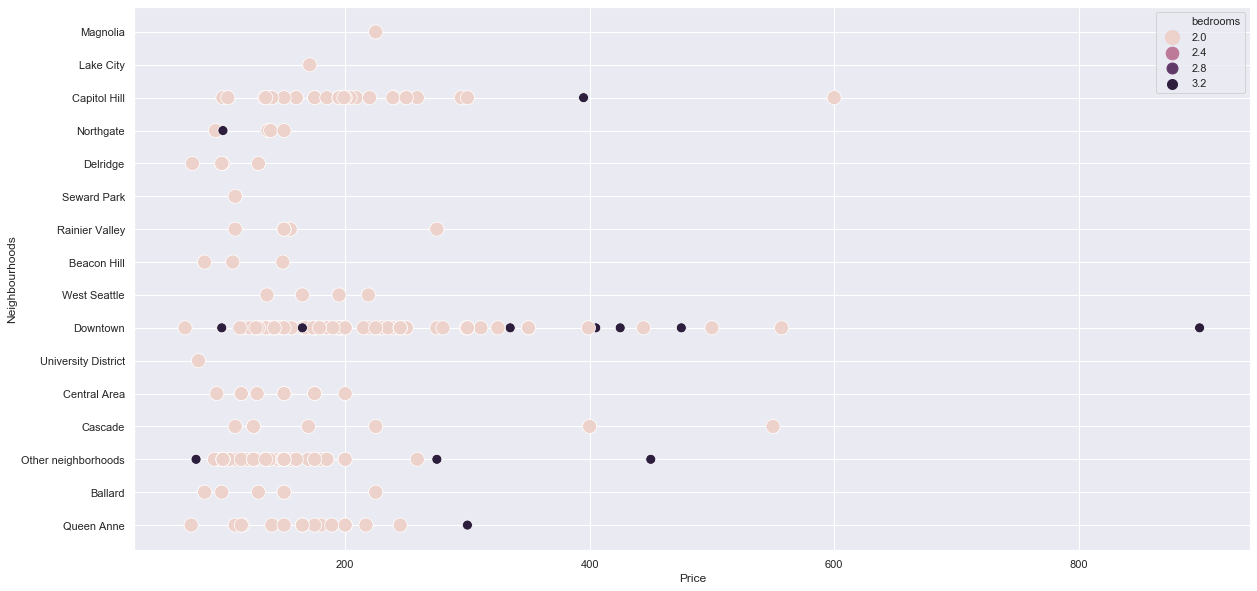

In [42]:
tic = time.time()
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.scatterplot(df3_b['price'],df3_b['neighbourhood_group_cleansed'],
                hue=df3_b['bedrooms'],
                size=df3_b['bedrooms'], sizes=(200,100))
plt.xlabel('Price')
plt.ylabel('Neighbourhoods')
plt.savefig('hoods.jpg')
toc = time.time() - tic
print("Time taken to generate this plot is %s seconds."%(toc)) #Downtown - definitely in demand

In [43]:
#going a bit more granular, looking at these listings which have at least 2 or more monthly reviews

df3_c = df3_b[df3_b['reviews_per_month'] >= 2]
df3_c.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
28,Queen Anne,300.0,3.0,24,54,84,356,2,6,2.47,100.0,10.0,10.0,10.0
174,Ballard,85.0,2.0,3,25,48,114,2,4,5.22,97.0,10.0,10.0,10.0
241,Queen Anne,165.0,2.0,23,53,83,347,2,4,2.57,98.0,10.0,10.0,10.0
300,Other neighborhoods,135.0,2.0,30,60,90,344,3,6,3.60,97.0,10.0,9.0,10.0
336,Other neighborhoods,95.0,2.0,13,27,47,111,2,4,4.31,97.0,10.0,10.0,10.0


In [44]:
df3_c.shape

(54, 14)

In [45]:
df3_c.to_csv('good_rev_apt.csv')

Time taken to generate this plot is 0.2784099578857422 seconds.


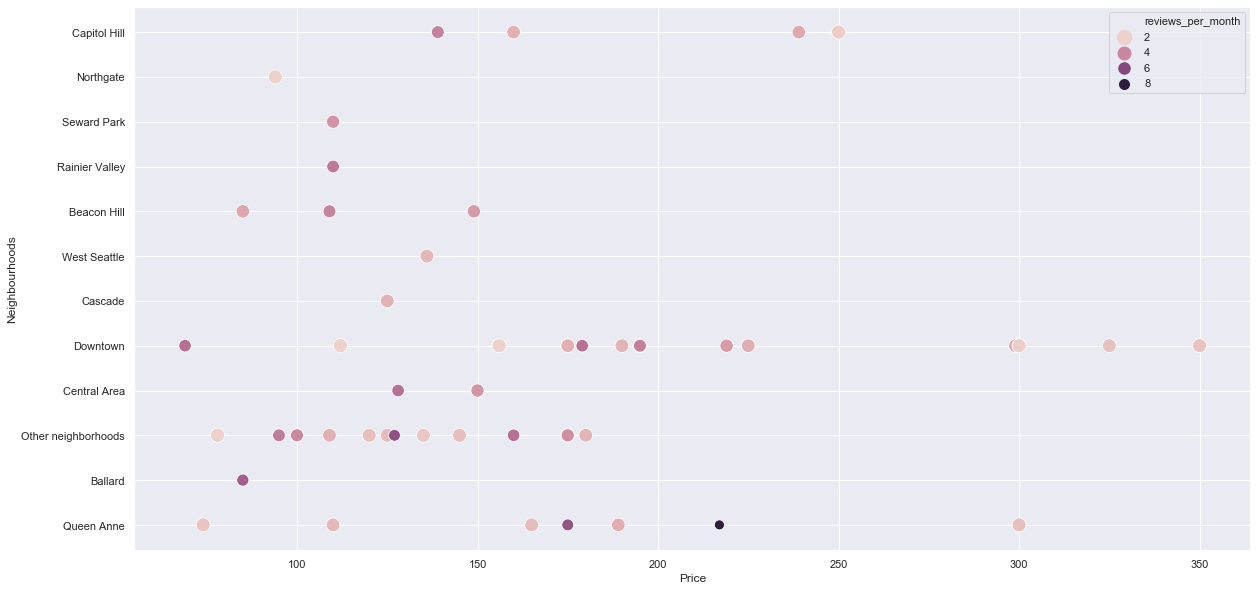

In [47]:
#price points for these listings by neighbourhood

tic = time.time()
plt.figure(figsize=(20,10))
sns.scatterplot(df3_c['price'],df3_c['neighbourhood_group_cleansed'],
                hue=df3_c['reviews_per_month'],size=df3_c['reviews_per_month'],
                sizes=(200,100))
plt.xlabel('Price')
plt.ylabel('Neighbourhoods')
plt.savefig('n_rev.jpg')
toc = time.time() - tic
print("Time taken to generate this plot is %s seconds."%(toc))

In [54]:
df3_c.describe() #summary stats at this point

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,160.592593,2.074074,18.500000,41.462963,65.629630,239.240741,2.703704,5.018519,3.312593,95.555556,9.944444,9.703704,9.888889
std,65.912326,0.264351,8.500277,16.410665,25.401156,107.330197,2.522575,1.090105,1.183575,3.154312,0.231212,0.500175,0.317221
min,69.000000,2.000000,0.000000,0.000000,0.000000,21.000000,2.000000,4.000000,2.000000,87.000000,9.000000,8.000000,9.000000
25%,110.000000,2.000000,14.000000,31.250000,58.250000,151.000000,2.000000,4.000000,2.462500,93.250000,10.000000,9.000000,10.000000
50%,149.500000,2.000000,19.500000,47.000000,75.500000,277.000000,2.000000,5.000000,2.885000,97.000000,10.000000,10.000000,10.000000
75%,186.750000,2.000000,25.000000,52.000000,82.000000,339.250000,3.000000,6.000000,4.070000,98.000000,10.000000,10.000000,10.000000
max,350.000000,3.000000,30.000000,60.000000,90.000000,364.000000,20.000000,8.000000,7.960000,100.000000,10.000000,10.000000,10.000000


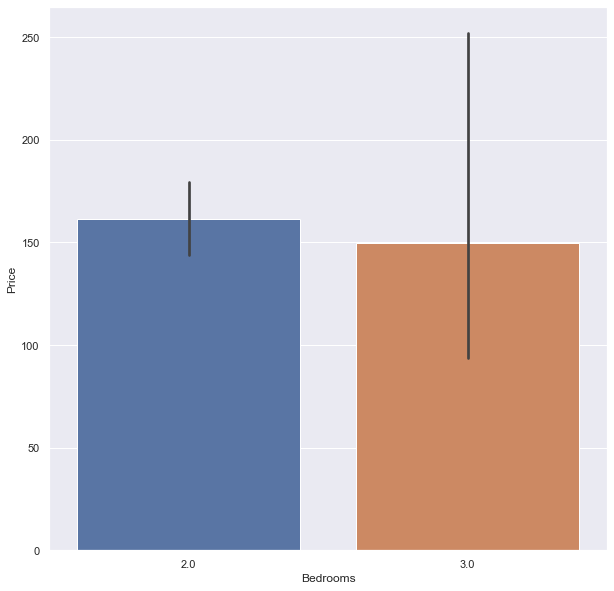

In [77]:
#since most listings are two or three bedrooms, can work with them as a categorical variable and plot 
#their price graph

plt.figure(figsize=(10,10))
sns.barplot(df3_c['bedrooms'],df3_c['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.savefig('bed_price.jpg');

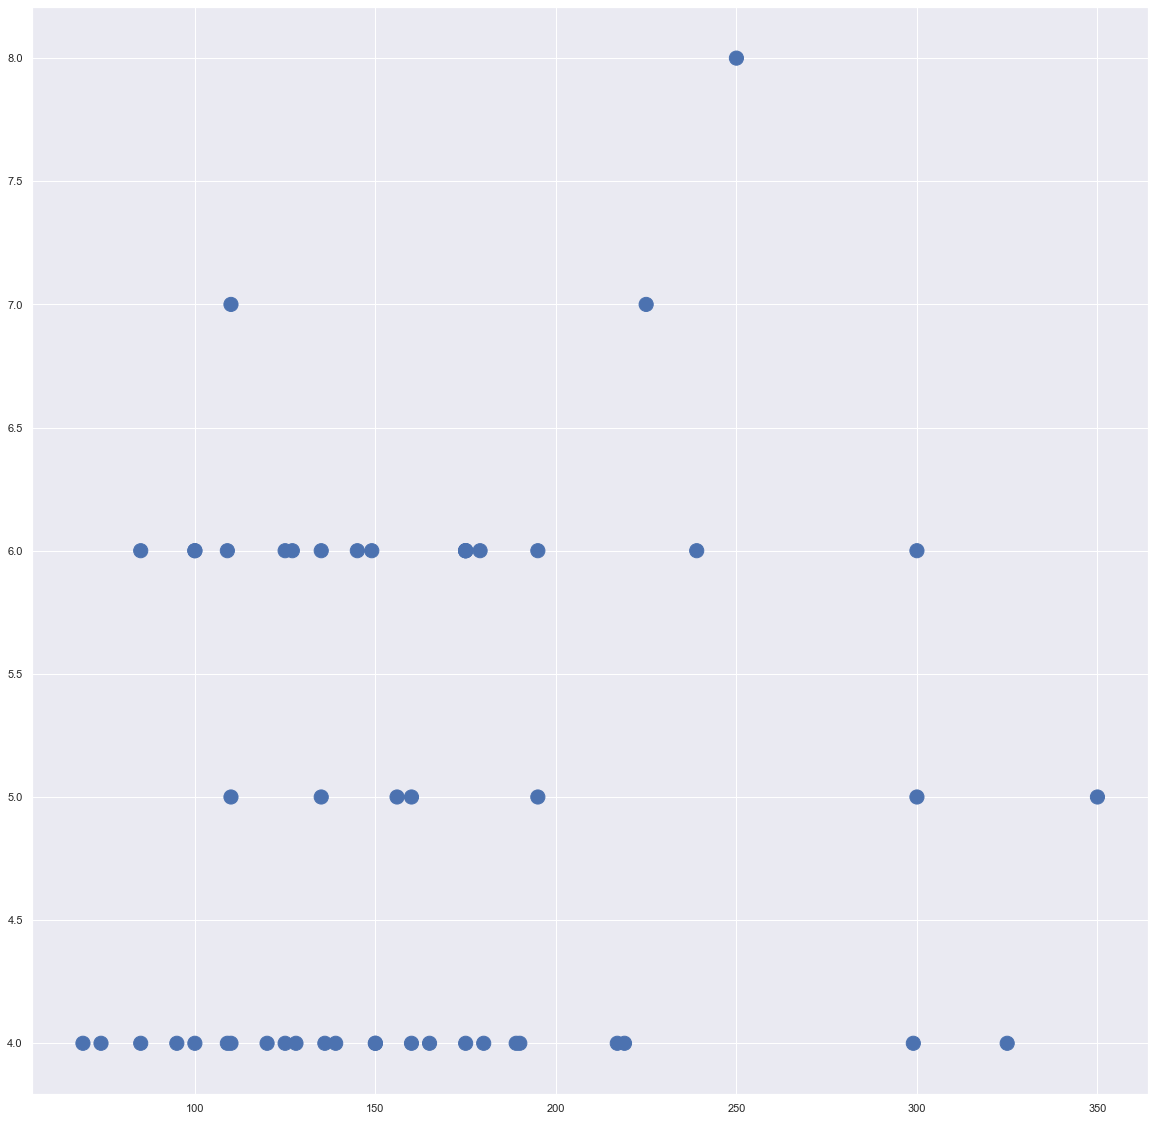

In [43]:
plt.figure(figsize=(20,20))
plt.scatter(df3_c['price'],df3_c['accommodates'],sizes=(200,200));

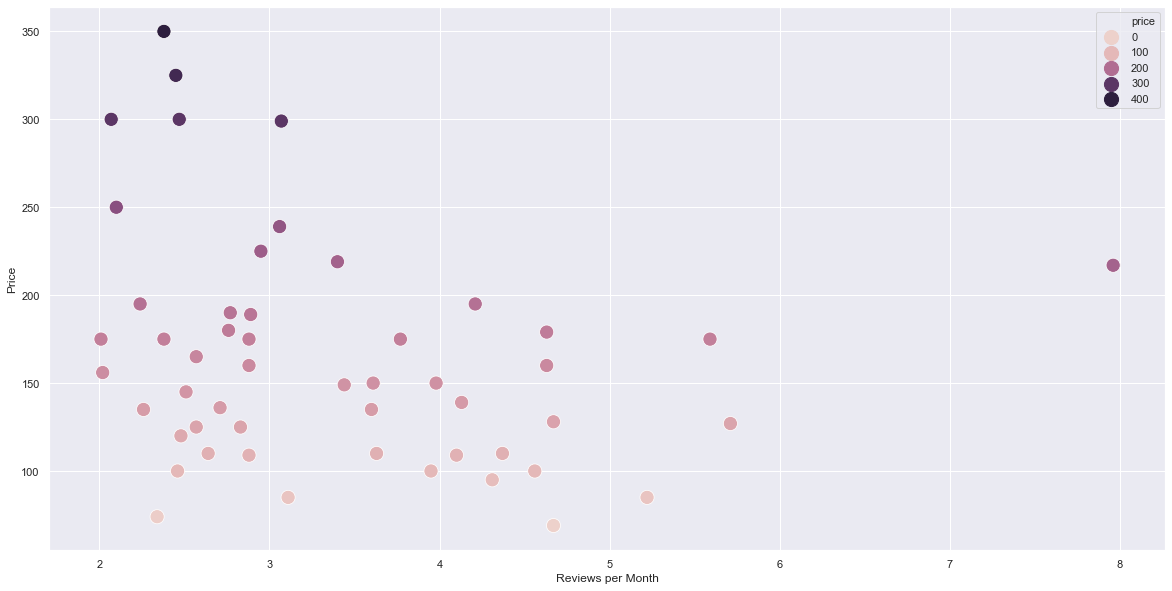

In [44]:
plt.figure(figsize=(20,10))
sns.scatterplot(df3_c['reviews_per_month'],df3_c['price'],hue=df3_c['price'],size=df3_c['price'],sizes=(200,200))
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.savefig('review_vs_price.jpg'); #higher the price, more the reviews? not necessarily

In [81]:
#looking at unique apartment listings by neighbourhood

neigh_price = df3_c['neighbourhood_group_cleansed'].value_counts()
neigh_price

Other neighborhoods    16
Downtown               15
Queen Anne              7
Capitol Hill            4
Central Area            3
Beacon Hill             3
Ballard                 1
Rainier Valley          1
Northgate               1
Seward Park             1
Cascade                 1
West Seattle            1
Name: neighbourhood_group_cleansed, dtype: int64

In [82]:
print("For apartments with these specs, {:.1f}% are in Other Neighborhoods.".format(16/54*100))
print("For apartments with these specs, {:.1f}% are Downtown.".format(15/54*100))

For apartments with these specs, 29.6% are in Other Neighborhoods.
For apartments with these specs, 27.8% are Downtown.


In [84]:
price_med = df3_c['price'].median()
print("The median price of apartments with these specs is USD {}.".format(price_med))

The median price of apartments with these specs is USD 149.5.


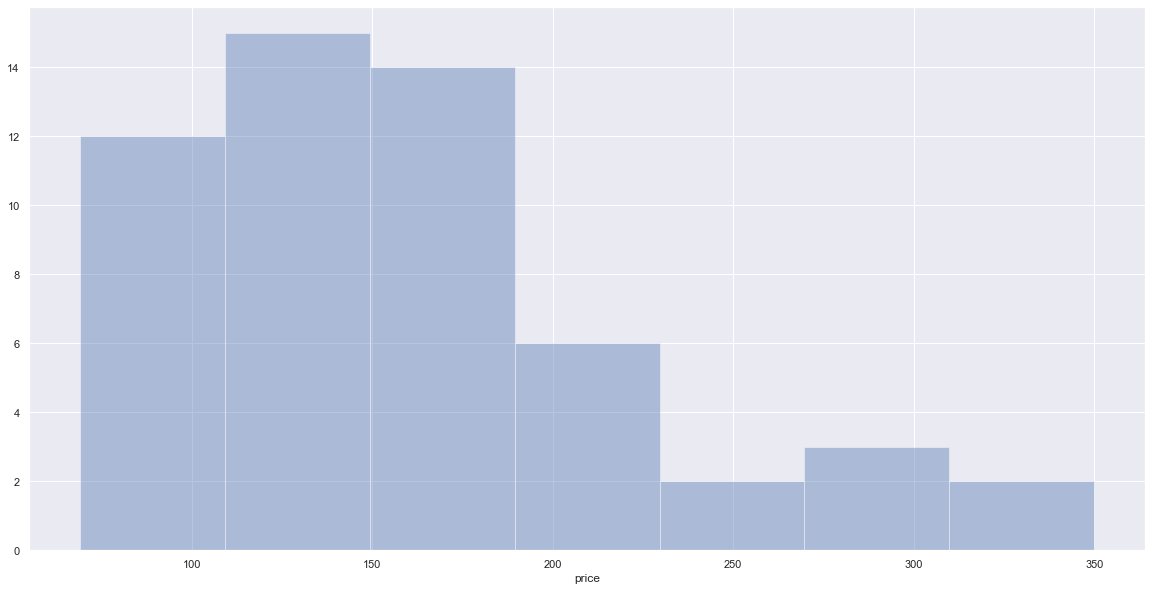

In [85]:
plt.figure(figsize=(20,10))
sns.distplot(df3_c['price'],kde=False) #as observed initially, most apartment prices stay within USD 100-200
plt.savefig('good_aprt_price.jpg');

In [86]:
df4 = df3_c.groupby(['neighbourhood_group_cleansed','price']).sum().reset_index() #lets take a closer look at neighbourhoods now
df4

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Ballard,85.0,2.0,3,25,48,114,2,4,5.22,97.0,10.0,10.0,10.0
1,Beacon Hill,85.0,2.0,19,48,64,91,3,6,3.11,97.0,10.0,9.0,10.0
2,Beacon Hill,109.0,3.0,17,42,68,68,2,6,4.10,97.0,10.0,9.0,10.0
3,Beacon Hill,149.0,2.0,17,47,77,352,2,6,3.44,87.0,10.0,8.0,10.0
4,Capitol Hill,139.0,2.0,24,45,75,164,2,4,4.13,99.0,10.0,10.0,10.0
5,Capitol Hill,160.0,2.0,25,55,85,175,2,5,2.88,92.0,10.0,10.0,10.0
6,Capitol Hill,239.0,2.0,26,49,79,337,3,6,3.06,97.0,10.0,10.0,10.0
7,Capitol Hill,250.0,2.0,26,52,82,346,4,8,2.10,96.0,10.0,10.0,10.0
8,Cascade,125.0,2.0,16,38,68,331,3,4,2.83,98.0,10.0,10.0,10.0
9,Central Area,128.0,2.0,14,29,59,334,2,4,4.67,92.0,10.0,10.0,10.0


In [87]:
df4['neighbourhood_group_cleansed'].value_counts()

Downtown               13
Other neighborhoods    12
Queen Anne              7
Capitol Hill            4
Beacon Hill             3
Central Area            2
Ballard                 1
Rainier Valley          1
Northgate               1
Seward Park             1
Cascade                 1
West Seattle            1
Name: neighbourhood_group_cleansed, dtype: int64

In [88]:
df4.columns

Index(['neighbourhood_group_cleansed', 'price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'reviews_per_month',
       'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'review_scores_communication'],
      dtype='object')

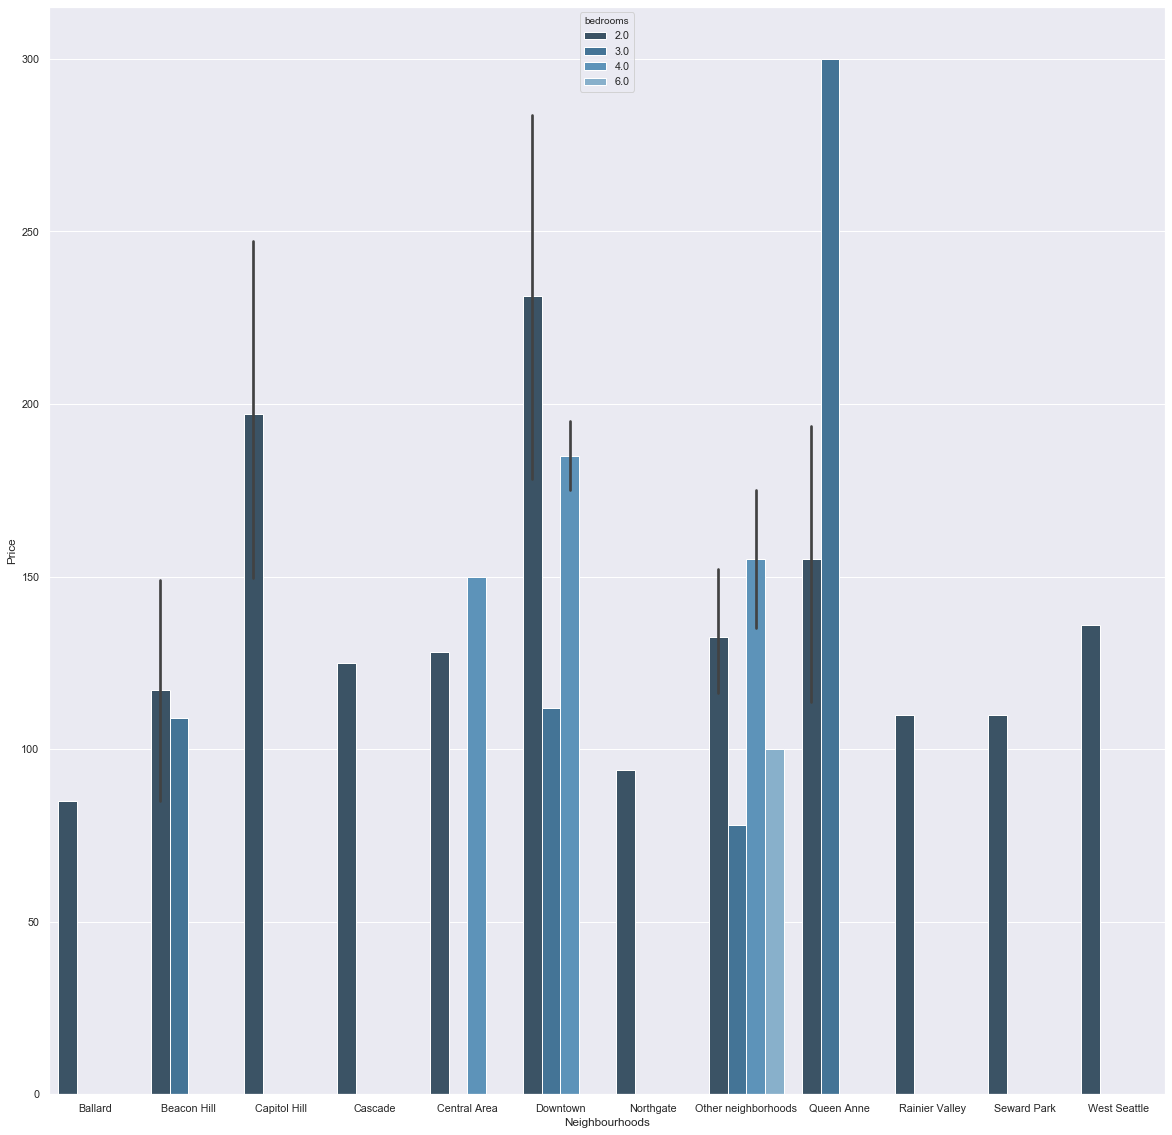

In [89]:
plt.figure(figsize=(20,20))
sns.set(font_scale=0.98)
sns.barplot(df4['neighbourhood_group_cleansed'],df4['price'], hue = df4['bedrooms'],palette='Blues_d')
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.savefig('apart_price_bed.jpg');

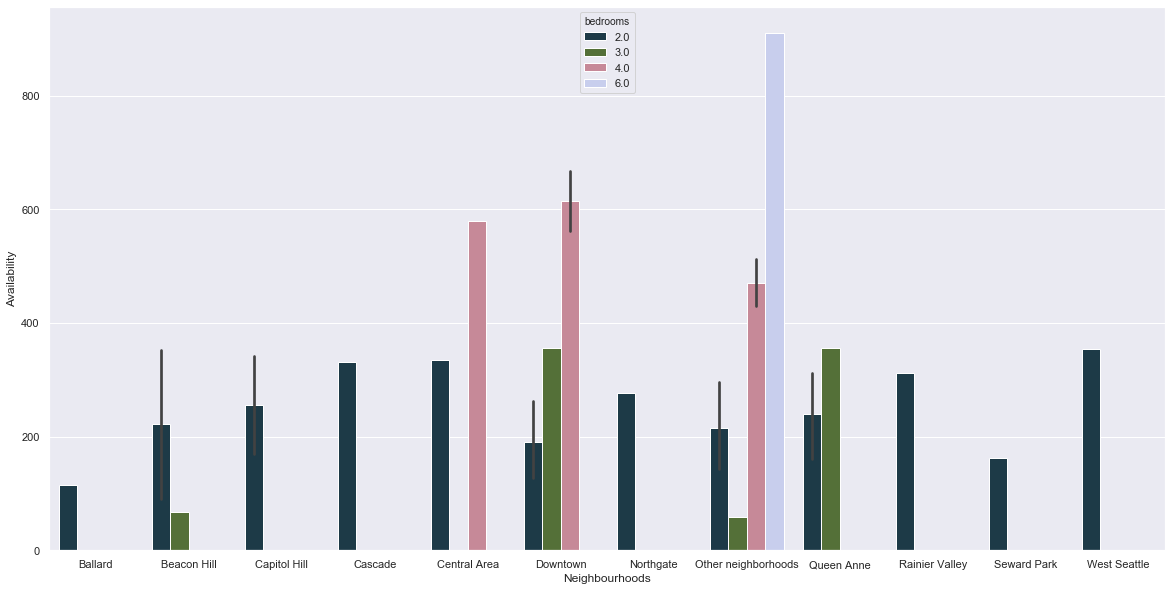

In [90]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.barplot(df4['neighbourhood_group_cleansed'],df4['availability_365'], hue = df4['bedrooms'],palette='cubehelix')
plt.xlabel('Neighbourhoods')
plt.ylabel('Availability')
plt.savefig('apart_avail.jpg');

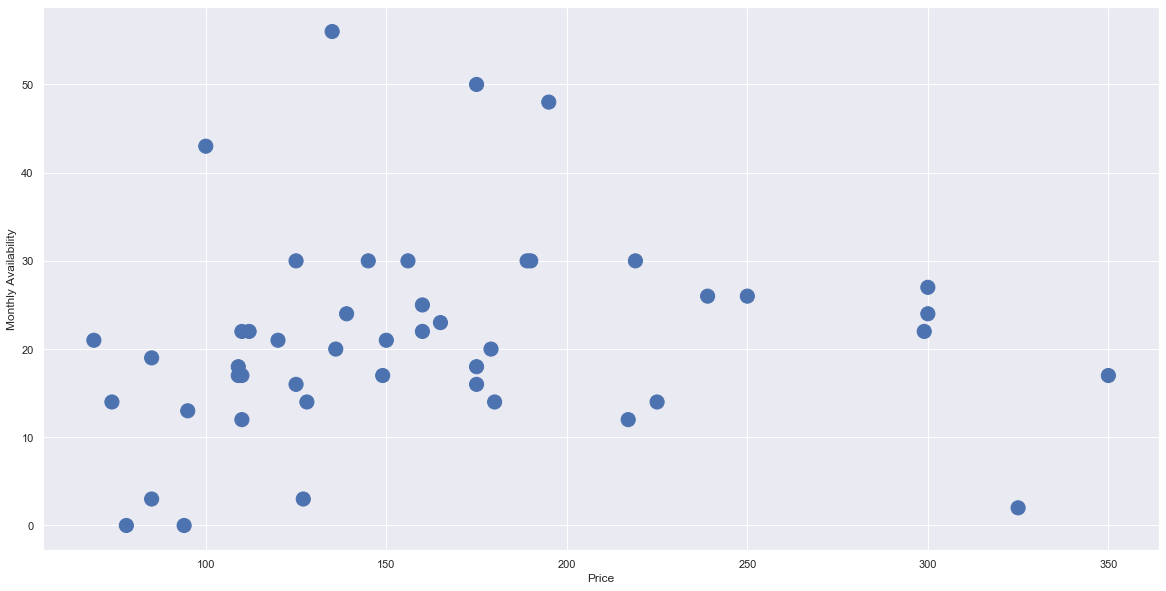

In [91]:
plt.figure(figsize=(20,10))
plt.scatter(df4['price'],df4['availability_30'],sizes=(200,200))
plt.xlabel('Price')
plt.ylabel('Monthly Availability')
plt.savefig('monthly_avail_price.jpg'); #good monthly availability for apartments within the USD 200 range

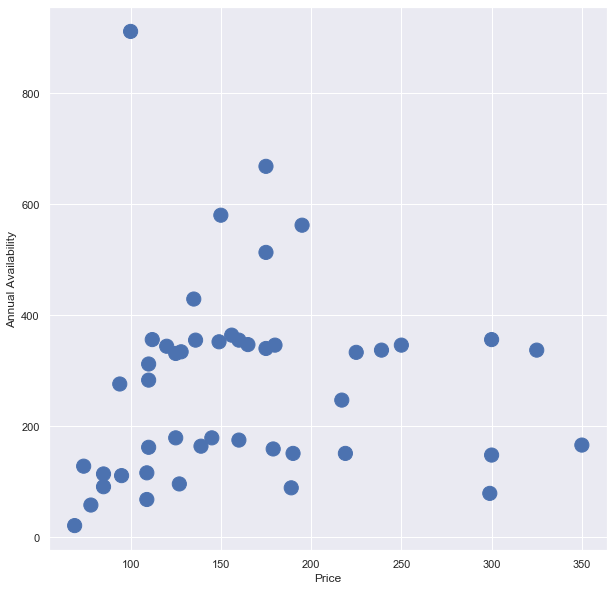

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(df4['price'],df4['availability_365'],
              sizes=(200,200))
plt.xlabel('Price')
plt.ylabel('Annual Availability')
plt.savefig('annual_avail_bed.jpg'); #and annually as well

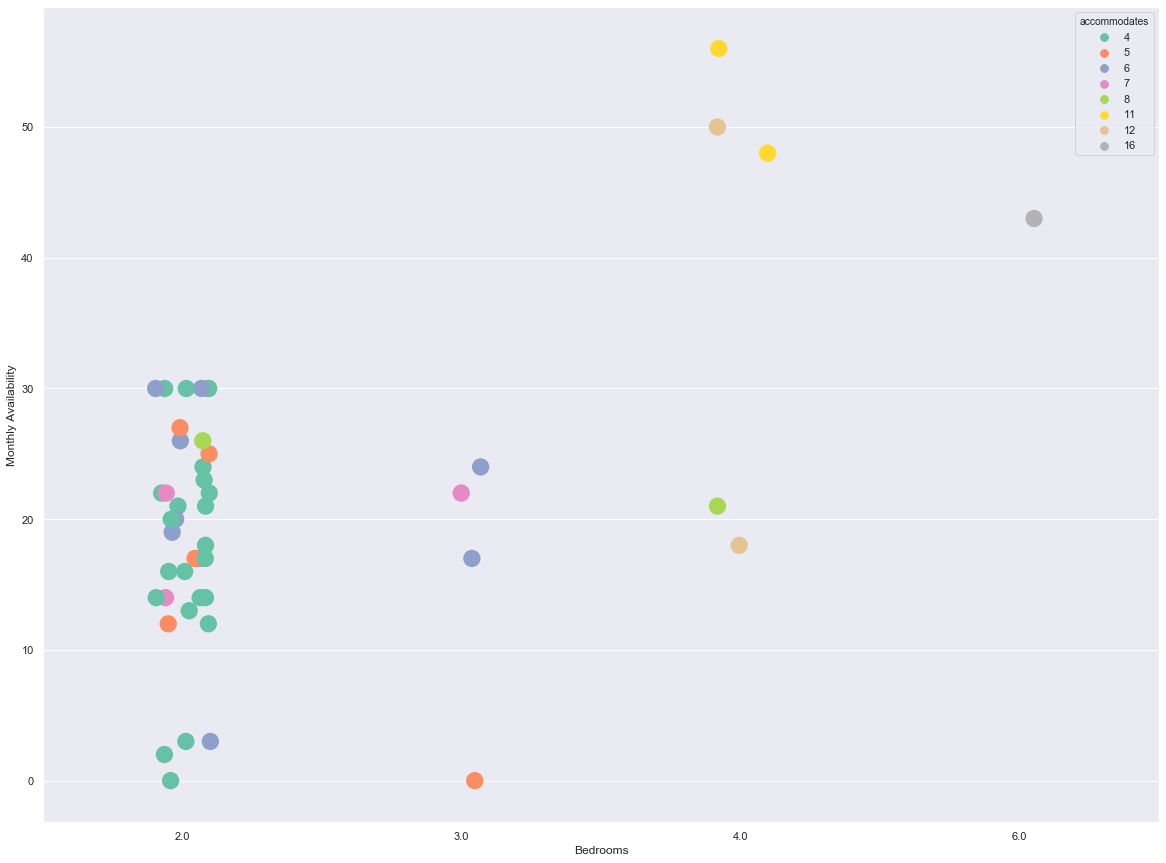

In [93]:
plt.figure(figsize=(20,15))
sns.stripplot(df4['bedrooms'],df4['availability_30'],hue=df4['accommodates'],
              size=df4['bedrooms'], palette='Set2',sizes=(300,300))
plt.xlabel('Bedrooms')
plt.ylabel('Monthly Availability')
plt.savefig('monthly_acco.jpg'); #groups of four-six have the best chances of finding good availability, of two bedroom listings

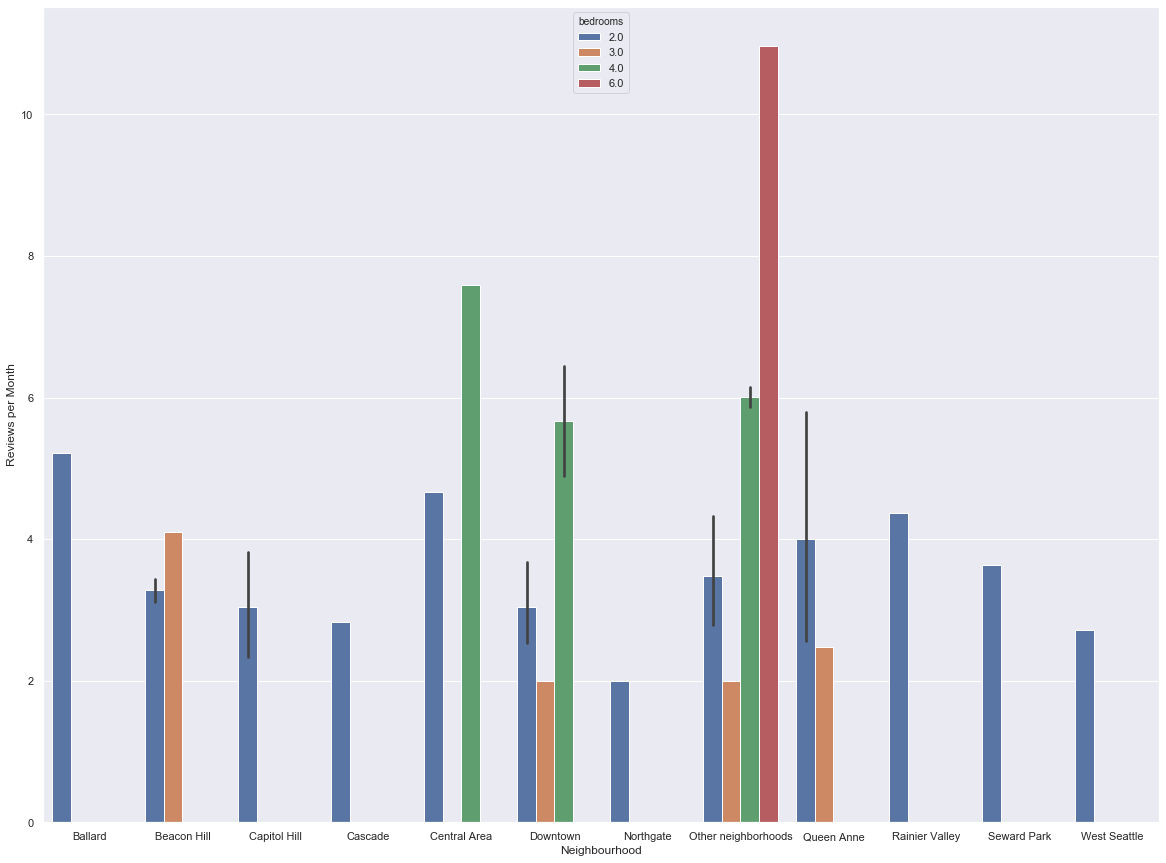

In [94]:
plt.figure(figsize=(20,15))
sns.barplot(df4['neighbourhood_group_cleansed'],df4['reviews_per_month'], hue=df4['bedrooms'])
plt.xlabel('Neighbourhood')
plt.ylabel('Reviews per Month')
plt.savefig('hood_reviews.jpg');

In [95]:
df4.columns

Index(['neighbourhood_group_cleansed', 'price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'reviews_per_month',
       'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'review_scores_communication'],
      dtype='object')

In [96]:
df5 = df4[['price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'reviews_per_month']]
df5.head()

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month
0,85.0,2.0,3,25,48,114,2,4,5.22
1,85.0,2.0,19,48,64,91,3,6,3.11
2,109.0,3.0,17,42,68,68,2,6,4.10
3,149.0,2.0,17,47,77,352,2,6,3.44
4,139.0,2.0,24,45,75,164,2,4,4.13


Time taken to generate pair-wise plots is 7.979327917098999 seconds.


<Figure size 1440x720 with 0 Axes>

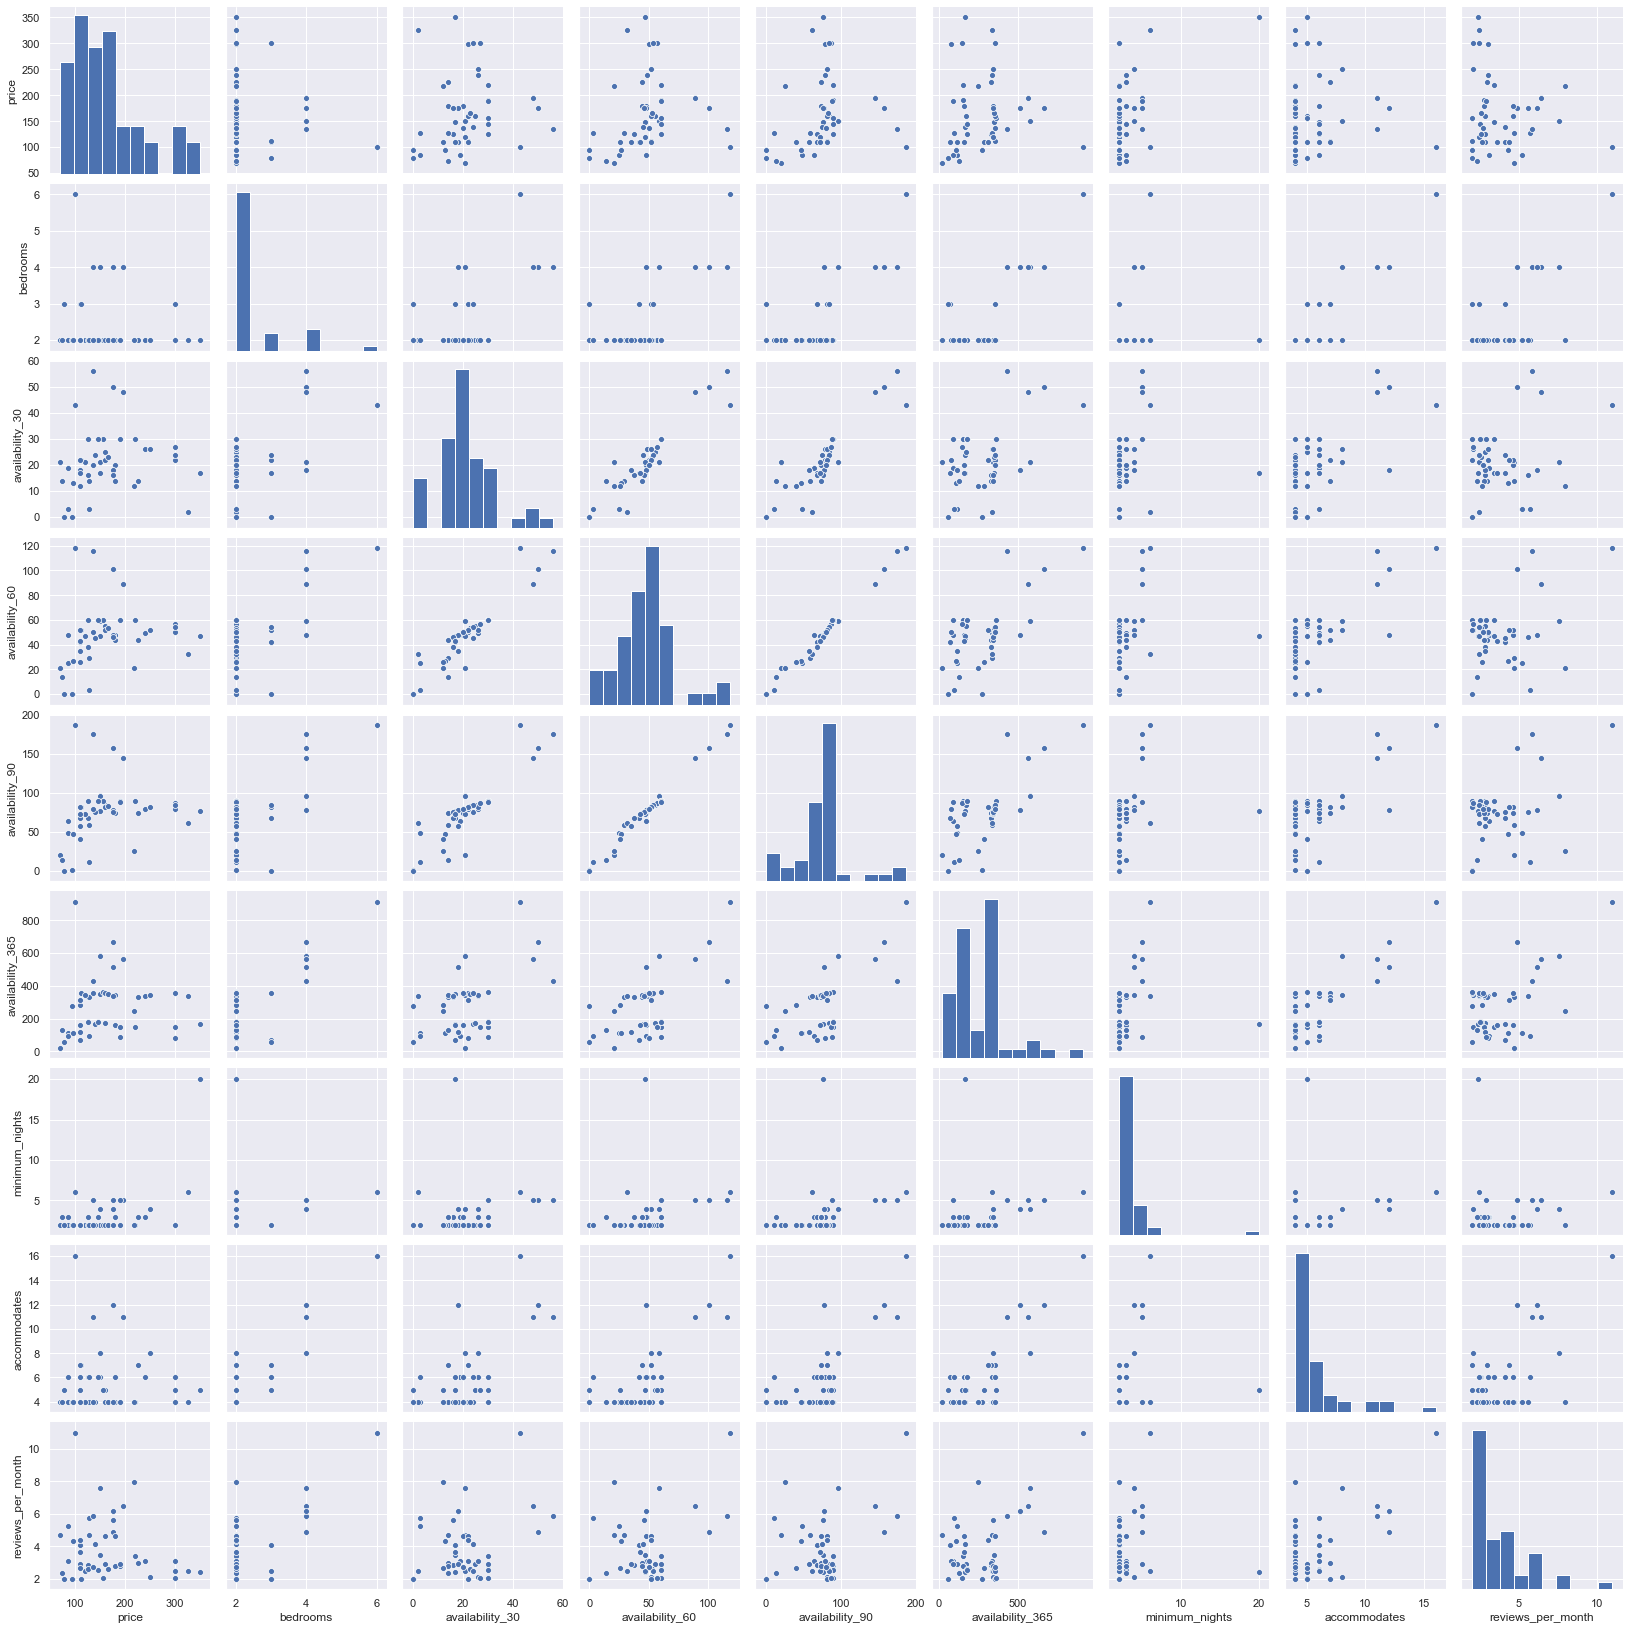

In [97]:
tic = time.time()
plt.figure(figsize=(20,10)) #pairwise correlations amonng the numeric variables 
sns.pairplot(df5)
toc = time.time() - tic
print("Time taken to generate pair-wise plots is %s seconds."%(toc))

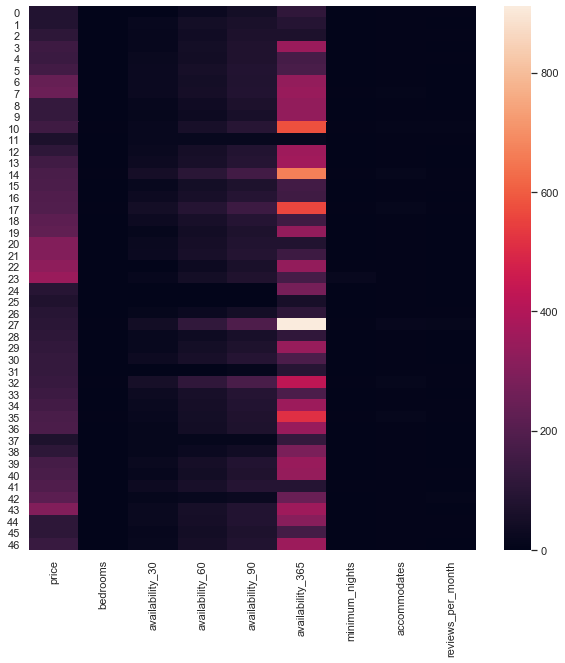

In [98]:
plt.figure(figsize=(10,10)) #bedrooms and period-wise availability seem to have a strong correlation
sns.heatmap(df5);

# Conclusion

#### While Downtown, Central Area and Queen Anne seem to score quite well in terms of price, availability and bedrooms for groups of four or more people, the 'Other Neighbourhoods' seem to pop up consistently in every metric analysed. This indicates a good balance of options available to guests, but more importantly, a healthy  market in terms of visbility for the hosts in Other Neighbourhoods. These neighbourhoods can be highlighted more in the listings thus. 